<a href="https://colab.research.google.com/github/leonardoub/SCRIPT_PALERMO/blob/master/explore_database_PA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explore database Palermo

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

In [0]:
#load data from pc
#train_dataset_path = '/home/leonardo/Scrivania/TESI_PA/database_training2.csv'
#test_dataset_path = '/home/leonardo/Scrivania/TESI_PA/database_nostro.csv'

In [4]:
#load data from Drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [0]:
train_dataset_path = '/gdrive/My Drive/AIM_PA/database_training2.csv'
test_dataset_path = '/gdrive/My Drive/AIM_PA/database_nostro.csv'

In [0]:
df_train = pd.read_csv(train_dataset_path)
df_test = pd.read_csv(test_dataset_path)

In [7]:
df_train.columns

Index(['Histology', 'Survival.time (months)', 'OS', 'deadstatus.event',
       'VoxelVolume', 'Maximum3DDiameter', 'MeshVolume', 'MajorAxisLength',
       'Sphericity', 'LeastAxisLength',
       ...
       'SmallAreaEmphasis', 'LowGrayLevelZoneEmphasis', 'ZoneEntropy',
       'SmallAreaLowGrayLevelEmphasis', 'Coarseness', 'Complexity', 'Strength',
       'Contrast.1', 'Busyness', 'Overall.Stage'],
      dtype='object', length=112)

In [0]:
df_train.rename(columns={'Survival.time (months)':'Surv_time_months'}, inplace=True)

In [0]:
df_test.rename(columns={'Survival.time (months)':'Surv_time_months'}, inplace=True)

In [0]:
df_train.rename(columns={'deadstatus.event':'Deadstatus_event'}, inplace=True)
df_test.rename(columns={'deadstatus.event':'Deadstatus_event'}, inplace=True)

In [0]:
df_train.rename(columns={'Overall.Stage':'Overall_Stage'}, inplace=True)
df_test.rename(columns={'Overall.Stage':'Overall_Stage'}, inplace=True)

In [0]:
df_train.rename(columns={'GrayLevelNonUniformityNormalized.1':'GrayLevelNonUniformityNormalized_1'}, inplace=True)
df_test.rename(columns={'GrayLevelNonUniformityNormalized.1':'GrayLevelNonUniformityNormalized_1'}, inplace=True)

In [0]:
df_train.rename(columns={'Contrast.1':'Contrast_1'}, inplace=True)
df_test.rename(columns={'Contrast.1':'Contrast_1'}, inplace=True)

In [14]:
df_train.head()

,Histology,Surv_time_months,OS,Deadstatus_event,VoxelVolume,Maximum3DDiameter,MeshVolume,MajorAxisLength,Sphericity,LeastAxisLength,Elongation,SurfaceVolumeRatio,Maximum2DDiameterSlice,Flatness,SurfaceArea,MinorAxisLength,Maximum2DDiameterColumn,Maximum2DDiameterRow,GrayLevelVariance,HighGrayLevelEmphasis,DependenceEntropy,DependenceNonUniformity,GrayLevelNonUniformity,SmallDependenceEmphasis,SmallDependenceHighGrayLevelEmphasis,DependenceNonUniformityNormalized,LargeDependenceEmphasis,LargeDependenceLowGrayLevelEmphasis,DependenceVariance,LargeDependenceHighGrayLevelEmphasis,SmallDependenceLowGrayLevelEmphasis,LowGrayLevelEmphasis,JointAverage,SumAverage,JointEntropy,ClusterShade,MaximumProbability,Idmn,JointEnergy,Contrast,...,Kurtosis,Mean,ShortRunLowGrayLevelEmphasis,GrayLevelVariance.1,LowGrayLevelRunEmphasis,GrayLevelNonUniformityNormalized,RunVariance,GrayLevelNonUniformity.1,LongRunEmphasis,ShortRunHighGrayLevelEmphasis,RunLengthNonUniformity,ShortRunEmphasis,LongRunHighGrayLevelEmphasis,RunPercentage,LongRunLowGrayLevelEmphasis,RunEntropy,HighGrayLevelRunEmphasis,RunLengthNonUniformityNormalized,GrayLevelVariance.2,ZoneVariance,GrayLevelNonUniformityNormalized_1,SizeZoneNonUniformityNormalized,SizeZoneNonUniformity,GrayLevelNonUniformity.2,LargeAreaEmphasis,SmallAreaHighGrayLevelEmphasis,ZonePercentage,LargeAreaLowGrayLevelEmphasis,LargeAreaHighGrayLevelEmphasis,HighGrayLevelZoneEmphasis,SmallAreaEmphasis,LowGrayLevelZoneEmphasis,ZoneEntropy,SmallAreaLowGrayLevelEmphasis,Coarseness,Complexity,Strength,Contrast_1,Busyness,Overall_Stage
0,adenocarcinoma,5,1_anno,1,51905.377962,66.288317,51847.748274,50.574214,0.649258,37.884620,0.821088,0.199752,63.135672,0.749090,10356.675894,41.525899,65.067279,55.325619,12.481889,1084.854684,5.949646,918.046673,5312.127441,0.122582,97.652454,0.050648,141.807349,0.124010,42.380287,163828.301666,0.000266,0.001208,33.190463,66.380925,4.331076,-475.448161,0.308299,0.994676,0.133643,8.029403,...,17.777521,5.650502,0.001166,17.478141,0.001372,0.192540,1.399893,2288.112500,3.749302,793.234742,6675.859117,0.776723,4220.221337,0.654950,0.003806,4.209293,1049.544424,0.560736,34.869500,42116.076135,0.060025,0.517739,1145.238698,132.775769,42183.224231,540.316964,0.122035,36.510775,4.877236e+07,751.520796,0.747563,0.002453,5.741322,0.001663,0.000357,928.016789,1.153806,0.020920,1.306338,I
1,adenocarcinoma,18,2_anni,1,13432.502747,58.057539,13312.697411,48.354803,0.572236,18.135097,0.546338,0.356577,40.146103,0.375042,4747.006589,26.418066,32.760898,56.652510,60.615944,1076.589137,7.130906,595.667519,351.846858,0.307871,239.202712,0.126873,32.011715,0.031426,12.612334,41890.348882,0.001812,0.003214,33.522040,67.044080,7.487967,-2829.110940,0.055759,0.985695,0.015596,38.337756,...,5.224099,-91.310969,0.003404,65.432452,0.003524,0.064158,0.230922,262.139314,1.567042,926.829706,3237.676584,0.908183,1777.017297,0.869059,0.004164,5.072184,1044.275778,0.790377,84.615342,598.216508,0.033349,0.543736,843.878866,51.757732,607.367912,543.633876,0.330564,0.465530,8.137725e+05,763.567010,0.764879,0.006307,6.451087,0.004959,0.001680,2944.805484,2.266070,0.146173,0.253533,I
2,adenocarcinoma,31,3_anni,0,25843.872675,52.918217,25724.437234,39.406474,0.675497,28.487740,0.891907,0.242519,46.415213,0.722920,6238.658603,35.146929,47.180420,46.322906,55.064124,1131.900166,6.932158,844.783490,1023.136953,0.253452,192.059998,0.093605,57.855402,0.045979,22.286238,79266.271357,0.000812,0.001864,34.046184,68.092368,6.796695,-3133.512010,0.106695,0.984515,0.033042,32.375097,...,5.387644,-67.724986,0.001973,61.733697,0.002096,0.085594,0.426431,626.125860,1.968083,906.575851,5266.417163,0.870954,2393.005796,0.809077,0.002930,4.968901,1079.567623,0.718481,68.928494,3157.415098,0.036760,0.531612,1319.991542,91.276279,3170.626259,525.709823,0.275125,2.306913,4.377395e+06,732.877970,0.757392,0.003456,6.294554,0.002520,0.000745,2146.780339,1.238883,0.152919,0.611772,I
3,adenocarcinoma,38,4_anni,1,22152.709032,46.635312,22099.0167

In [15]:
df_train.columns

Index(['Histology', 'Surv_time_months', 'OS', 'Deadstatus_event',
       'VoxelVolume', 'Maximum3DDiameter', 'MeshVolume', 'MajorAxisLength',
       'Sphericity', 'LeastAxisLength',
       ...
       'SmallAreaEmphasis', 'LowGrayLevelZoneEmphasis', 'ZoneEntropy',
       'SmallAreaLowGrayLevelEmphasis', 'Coarseness', 'Complexity', 'Strength',
       'Contrast_1', 'Busyness', 'Overall_Stage'],
      dtype='object', length=112)

In [16]:
df_train.Histology.unique()


array(['adenocarcinoma', 'large cell', 'squamous cell carcinoma'],
      dtype=object)

In [17]:
df_test.Histology.unique()

array([nan, 'squamous cell carcinoma', 'large cell', 'adenocarcinoma'],
      dtype=object)

## Boxplot survival time grouped by histology

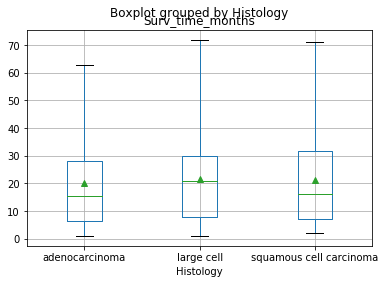

In [18]:
boxplot = df_train.boxplot(column=['Surv_time_months'], by='Histology', showmeans=True, whis='range')

Il triangolino verde indica il valore medio

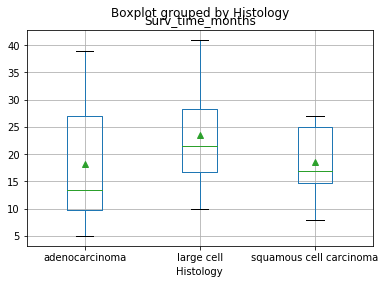

In [19]:
boxplot = df_test.boxplot(column=['Surv_time_months'], by='Histology', showmeans=True, whis='range')

## Boxplot survival time grouped by Overall Stage

In [20]:
df_train.Overall_Stage

0         I
1         I
2         I
3         I
4      IIIa
       ... 
126    IIIb
127    IIIb
128    IIIb
129    IIIb
130    IIIb
Name: Overall_Stage, Length: 131, dtype: object

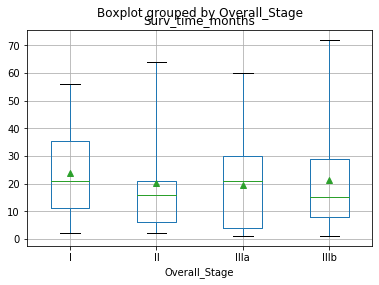

In [21]:
boxplot = df_train.boxplot(column=['Surv_time_months'], by='Overall_Stage', showmeans=True, whis='range')

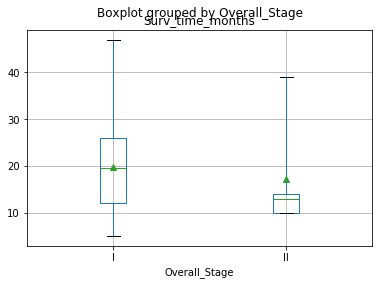

In [22]:
boxplot = df_test.boxplot(column=['Surv_time_months'], by='Overall_Stage', showmeans=True, whis='range')

# Correlation

In [0]:
import seaborn as sns

Calcolo del coefficiente di correlazione di Pearson

In [0]:
train_data = df_train.drop(['Histology', 'Surv_time_months', 'OS', 'Deadstatus_event','Overall_Stage'], axis=1)

In [25]:
train_data.shape

(131, 107)

In [0]:
mean = train_data.mean(axis=0)
train_data_stand = train_data - mean
std = train_data.std(axis=0)
train_data_stand /= std

In [27]:
train_data_stand

,VoxelVolume,Maximum3DDiameter,MeshVolume,MajorAxisLength,Sphericity,LeastAxisLength,Elongation,SurfaceVolumeRatio,Maximum2DDiameterSlice,Flatness,SurfaceArea,MinorAxisLength,Maximum2DDiameterColumn,Maximum2DDiameterRow,GrayLevelVariance,HighGrayLevelEmphasis,DependenceEntropy,DependenceNonUniformity,GrayLevelNonUniformity,SmallDependenceEmphasis,SmallDependenceHighGrayLevelEmphasis,DependenceNonUniformityNormalized,LargeDependenceEmphasis,LargeDependenceLowGrayLevelEmphasis,DependenceVariance,LargeDependenceHighGrayLevelEmphasis,SmallDependenceLowGrayLevelEmphasis,LowGrayLevelEmphasis,JointAverage,SumAverage,JointEntropy,ClusterShade,MaximumProbability,Idmn,JointEnergy,Contrast,DifferenceEntropy,InverseVariance,DifferenceVariance,Idn,...,10Percentile,Kurtosis,Mean,ShortRunLowGrayLevelEmphasis,GrayLevelVariance.1,LowGrayLevelRunEmphasis,GrayLevelNonUniformityNormalized,RunVariance,GrayLevelNonUniformity.1,LongRunEmphasis,ShortRunHighGrayLevelEmphasis,RunLengthNonUniformity,ShortRunEmphasis,LongRunHighGrayLevelEmphasis,RunPercentage,LongRunLowGrayLevelEmphasis,RunEntropy,HighGrayLevelRunEmphasis,RunLengthNonUniformityNormalized,GrayLevelVariance.2,ZoneVariance,GrayLevelNonUniformityNormalized_1,SizeZoneNonUniformityNormalized,SizeZoneNonUniformity,GrayLevelNonUniformity.2,LargeAreaEmphasis,SmallAreaHighGrayLevelEmphasis,ZonePercentage,LargeAreaLowGrayLevelEmphasis,LargeAreaHighGrayLevelEmphasis,HighGrayLevelZoneEmphasis,SmallAreaEmphasis,LowGrayLevelZoneEmphasis,ZoneEntropy,SmallAreaLowGrayLevelEmphasis,Coarseness,Complexity,Strength,Contrast_1,Busyness
0,-0.326999,-0.324600,-0.325959,-0.421079,0.561642,0.263757,0.500573,-0.552050,0.037308,1.106313,-0.347948,-0.165769,-0.025317,-0.414145,-1.335743,-0.813071,-2.824541,-0.634351,0.334305,-1.126107,-1.928055,-1.113628,2.934736,-0.120940,2.821184,1.495617,-0.540674,-0.378705,-0.684333,-0.684333,-2.317268,1.007081,4.555993,0.632496,4.589561,-1.113551,-1.678802,0.969446,-1.314485,0.744786,...,1.260758,1.158829,0.991254,-0.477563,-1.395013,-0.417375,2.340442,3.134412,-0.032854,2.945550,-1.255217,-0.560125,-2.008450,1.078044,-2.350651,-0.194420,-1.826327,-0.808912,-1.870073,-1.782876,0.592133,2.517908,0.538394,-0.611232,-0.280137,0.592947,-0.792517,-1.116086,0.324868,-0.330176,-0.872779,0.569674,-0.535195,-2.494285,-0.525241,-0.384378,-1.431675,-0.431619,-0.748803,0.428486
1,-0.785959,-0.588352,-0.785827,-0.504174,-0.209052,-1.104920,-1.321997,0.832807,-0.898101,-1.305701,-0.834556,-1.014615,-1.143253,-0.369513,-0.203455,-0.838653,0.322728,-0.778917,-0.715397,0.610489,0.145149,0.265639,-0.642557,-0.217092,-0.449308,-0.769577,0.346492,-0.093280,-0.611749,-0.611749,0.344859,0.477566,-0.515063,-0.012260,-0.594141,-0.026171,0.417892,-0.317860,0.063599,-0.218600,...,-0.167729,-0.530368,-0.077012,0.030173,-0.226248,-0.037642,-0.643090,-0.568272,-0.725264,-0.614104,-0.732080,-0.788133,0.680449,-0.803587,0.659974,-0.177157,0.297810,-0.825228,0.657376,-0.387514,-0.571869,-0.235669,1.102310,-0.750339,-0.768952,-0.572074,-0.775330,0.543521,-0.327762,-0.330961,-0.829963,1.090705,0.683129,-0.468298,0.643920,0.167390,-0.254404,0.205362,-0.158492,-0.876045
2,-0.637898,-0.753039,-0.637708,-0.839201,0.824200,-0.387464,0.970356,-0.174393,-0.643021,0.937562,-0.705164,-0.524177,-0.644277,-0.716966,-0.334054,-0.667465,-0.206805,-0.667205,-0.573338,0.100455,-0.545323,-0.336336,0.199466,-0.201979,0.613527,-0.075259,-0.227705,-0.285335,-0.497012,-0.497012,-0.238073,0.409084,0.507744,-0.097035,0.171963,-0.240094,0.034290,0.193277,-0.114283,-0.167127,...,-0.016895,-0.508361,0.182845,-0.294445,-0.316396,-0.289695,-0.144933,0.051001,-0.600866,0.040065,-0.811391,-0.653594,-0.081030,-0.329184,-0.183435,-0.236599,0.043563,-0.715940,-0.133909,-0.827527,-0.500119,0.116467,0.839308,-0.530567,-0.530520,-0.500248,-0.868207,0.102297,-0.294422,-0.330903,-0.939040,0.865427,-0.218079,-0.915112,-0.221102,-0.222361,-0.720239,-0.382896,-0.126698,-0.432151
3,-0.681932,-0.954372,-0.680973,-0.867883,1.403699,-0.412298,0.056476,-0.

In [28]:
train_data_stand.corr()

,VoxelVolume,Maximum3DDiameter,MeshVolume,MajorAxisLength,Sphericity,LeastAxisLength,Elongation,SurfaceVolumeRatio,Maximum2DDiameterSlice,Flatness,SurfaceArea,MinorAxisLength,Maximum2DDiameterColumn,Maximum2DDiameterRow,GrayLevelVariance,HighGrayLevelEmphasis,DependenceEntropy,DependenceNonUniformity,GrayLevelNonUniformity,SmallDependenceEmphasis,SmallDependenceHighGrayLevelEmphasis,DependenceNonUniformityNormalized,LargeDependenceEmphasis,LargeDependenceLowGrayLevelEmphasis,DependenceVariance,LargeDependenceHighGrayLevelEmphasis,SmallDependenceLowGrayLevelEmphasis,LowGrayLevelEmphasis,JointAverage,SumAverage,JointEntropy,ClusterShade,MaximumProbability,Idmn,JointEnergy,Contrast,DifferenceEntropy,InverseVariance,DifferenceVariance,Idn,...,10Percentile,Kurtosis,Mean,ShortRunLowGrayLevelEmphasis,GrayLevelVariance.1,LowGrayLevelRunEmphasis,GrayLevelNonUniformityNormalized,RunVariance,GrayLevelNonUniformity.1,LongRunEmphasis,ShortRunHighGrayLevelEmphasis,RunLengthNonUniformity,ShortRunEmphasis,LongRunHighGrayLevelEmphasis,RunPercentage,LongRunLowGrayLevelEmphasis,RunEntropy,HighGrayLevelRunEmphasis,RunLengthNonUniformityNormalized,GrayLevelVariance.2,ZoneVariance,GrayLevelNonUniformityNormalized_1,SizeZoneNonUniformityNormalized,SizeZoneNonUniformity,GrayLevelNonUniformity.2,LargeAreaEmphasis,SmallAreaHighGrayLevelEmphasis,ZonePercentage,LargeAreaLowGrayLevelEmphasis,LargeAreaHighGrayLevelEmphasis,HighGrayLevelZoneEmphasis,SmallAreaEmphasis,LowGrayLevelZoneEmphasis,ZoneEntropy,SmallAreaLowGrayLevelEmphasis,Coarseness,Complexity,Strength,Contrast_1,Busyness
VoxelVolume,1.000000,0.821982,0.999999,0.785606,-0.329751,0.898913,0.020392,-0.679146,0.832976,0.072277,0.950756,0.889105,0.838170,0.837324,-0.176830,0.528070,0.033228,0.939428,0.923283,-0.572156,-0.317799,-0.486348,0.369668,0.144763,0.216950,0.432934,-0.362273,-0.015689,0.493080,0.493080,-0.356995,-0.200703,0.205100,0.524585,0.270697,-0.436992,-0.487864,0.510222,-0.388195,0.577134,...,0.323978,0.328833,0.413992,-0.111564,-0.142230,-0.052167,0.418276,0.298776,0.938199,0.350780,0.469435,0.973643,-0.490008,0.469550,-0.458102,0.118459,-0.254205,0.530056,-0.501210,0.248150,0.799097,0.075534,-0.411886,0.899479,0.922172,0.799043,0.475936,-0.572976,0.523293,0.611567,0.497011,-0.412217,-0.368620,0.506717,-0.381946,-0.401634,0.277302,-0.510155,-0.458069,0.937894
Maximum3DDiameter,0.821982,1.000000,0.821800,0.964760,-0.678628,0.812696,-0.271438,-0.683336,0.917765,-0.271877,0.911623,0.901223,0.940584,0.958797,-0.220656,0.639461,0.133962,0.786661,0.741102,-0.654213,-0.251020,-0.605156,0.395214,0.129414,0.263112,0.460671,-0.531704,-0.054131,0.608983,0.608983,-0.375524,-0.180379,0.249756,0.670078,0.298131,-0.525327,-0.549153,0.599396,-0.433522,0.695066,...,0.398349,0.371992,0.526980,-0.183269,-0.180156,-0.108437,0.445523,0.317060,0.755681,0.371774,0.594074,0.812268,-0.527681,0.517503,-0.498173,0.073990,-0.270332,0.641334,-0.547216,0.265182,0.621154,0.068929,-0.434710,0.782626,0.794181,0.621175,0.575123,-0.657133,0.372469,0.461945,0.595651,-0.428361,-0.533330,0.573314,-0.555928,-0.586992,0.257297,-0.642559,-0.592542,0.810919
MeshVolume,0.999999,0.821800,1.000000,0.785457,-0.329524,0.898705,0.020542,-0.678962,0.832789,0.072340,0.950769,0.888978,0.838067,0.837236,-0.176905,0.527940,0.032935,0.939282,0.923458,-0.572020,-0.317906,-0.486162,0.369643,0.144589,0.216857,0.432929,-0.362038,-0.015775,0.492963,0.492963,-0.357052,-0.200464,0.205177,0.524315,0.270745,-0.436857,-0.487829,0.510158,-0.388145,0.576903,...,0.324013,0.328922,0.413856,-0.111583,-0.142320,-0.052227,0.418311,0.298709,0.938334,0.350732,0.469275,0.973528,-0.489990,0.469492,-0.458066,0.118297,-0.254306,0.529929,-0.501173,0.248039,0.799463,0.075682,-0.411663,0.899224,0.922040,0.799408,0.475816,-0.572841,0.523224,0.612063,0.496873,-0.411994,-0.368391,0.506398,-0.381685,-0.401370,0.277025,-0.509976,-0.457835,0.937881
MajorAxisLength,0.785606,0.964760,0.785457,1.000000,-0.694906,0.740991,-0.405218,-0.609701,0.865958,-0.395222,0.888151,0.8

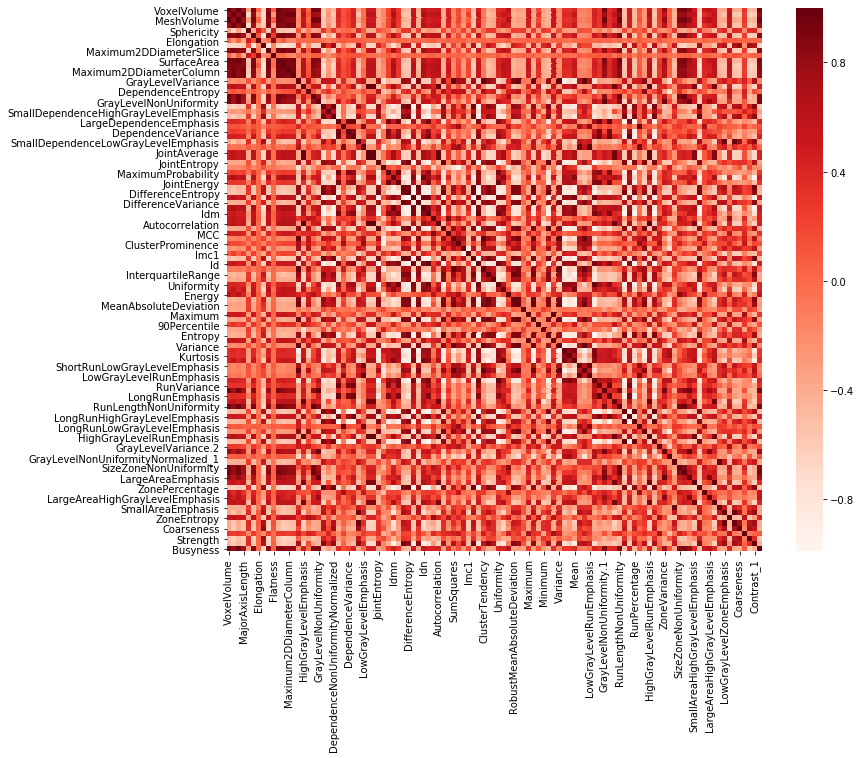

In [29]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = train_data_stand.corr()
sns.heatmap(cor, cmap=plt.cm.Reds)
plt.show()

In [0]:
test_data = df_test.drop(['Histology', 'Surv_time_months', 'OS', 'Deadstatus_event','Overall_Stage'], axis=1)

In [0]:
mean = test_data.mean(axis=0)
test_data_stand = test_data - mean
std = test_data.std(axis=0)
test_data_stand /= std

In [32]:
test_data_stand.corr()

,VoxelVolume,Maximum3DDiameter,MeshVolume,MajorAxisLength,Sphericity,LeastAxisLength,Elongation,SurfaceVolumeRatio,Maximum2DDiameterSlice,Flatness,SurfaceArea,MinorAxisLength,Maximum2DDiameterColumn,Maximum2DDiameterRow,GrayLevelVariance,HighGrayLevelEmphasis,DependenceEntropy,DependenceNonUniformity,GrayLevelNonUniformity,SmallDependenceEmphasis,SmallDependenceHighGrayLevelEmphasis,DependenceNonUniformityNormalized,LargeDependenceEmphasis,LargeDependenceLowGrayLevelEmphasis,DependenceVariance,LargeDependenceHighGrayLevelEmphasis,SmallDependenceLowGrayLevelEmphasis,LowGrayLevelEmphasis,JointAverage,SumAverage,JointEntropy,ClusterShade,MaximumProbability,Idmn,JointEnergy,Contrast,DifferenceEntropy,InverseVariance,DifferenceVariance,Idn,...,10Percentile,Kurtosis,Mean,ShortRunLowGrayLevelEmphasis,GrayLevelVariance.1,LowGrayLevelRunEmphasis,GrayLevelNonUniformityNormalized,RunVariance,GrayLevelNonUniformity.1,LongRunEmphasis,ShortRunHighGrayLevelEmphasis,RunLengthNonUniformity,ShortRunEmphasis,LongRunHighGrayLevelEmphasis,RunPercentage,LongRunLowGrayLevelEmphasis,RunEntropy,HighGrayLevelRunEmphasis,RunLengthNonUniformityNormalized,GrayLevelVariance.2,ZoneVariance,GrayLevelNonUniformityNormalized_1,SizeZoneNonUniformityNormalized,SizeZoneNonUniformity,GrayLevelNonUniformity.2,LargeAreaEmphasis,SmallAreaHighGrayLevelEmphasis,ZonePercentage,LargeAreaLowGrayLevelEmphasis,LargeAreaHighGrayLevelEmphasis,HighGrayLevelZoneEmphasis,SmallAreaEmphasis,LowGrayLevelZoneEmphasis,ZoneEntropy,SmallAreaLowGrayLevelEmphasis,Coarseness,Complexity,Strength,Contrast_1,Busyness
VoxelVolume,1.000000,0.832150,0.999999,0.772790,-0.026973,0.898585,-0.026232,-0.674293,0.847133,-0.011949,0.956395,0.904609,0.859533,0.845367,0.039323,0.445351,0.471074,0.917174,0.922014,-0.458634,-0.166511,-0.421095,0.444538,0.115145,0.420305,0.596791,-0.387049,-0.360264,0.402535,0.402535,-0.133123,-0.321224,0.259981,0.535395,0.191754,-0.253645,-0.310411,0.354390,-0.183318,0.566465,...,0.099790,0.177698,0.230512,-0.373381,0.116613,-0.367876,0.132198,0.488962,0.932558,0.461190,0.333150,0.974114,-0.406913,0.618176,-0.449488,-0.247236,0.273796,0.438972,-0.415452,0.398528,0.806805,-0.240787,-0.398823,0.836695,0.938663,0.806159,0.329359,-0.449761,0.660406,0.842977,0.393077,-0.391531,-0.389582,0.690677,-0.394299,-0.297500,0.449391,-0.331087,-0.372888,0.742542
Maximum3DDiameter,0.832150,1.000000,0.831531,0.977372,-0.473582,0.815658,-0.385520,-0.743839,0.920597,-0.410287,0.944157,0.916222,0.960730,0.954900,0.112700,0.513659,0.584957,0.843548,0.757146,-0.419874,-0.047244,-0.425442,0.475724,0.115045,0.512594,0.650602,-0.548812,-0.493851,0.480752,0.480752,-0.059112,-0.314523,0.318873,0.553464,0.215309,-0.175027,-0.254135,0.259224,-0.097237,0.566609,...,0.040821,0.189589,0.154486,-0.512180,0.183673,-0.506017,0.111051,0.506861,0.755496,0.472046,0.402294,0.826855,-0.396298,0.654078,-0.461056,-0.366550,0.356771,0.501048,-0.405869,0.406905,0.634012,-0.270826,-0.300028,0.835065,0.895683,0.633555,0.428969,-0.413642,0.497271,0.683364,0.471586,-0.287506,-0.567967,0.727569,-0.568026,-0.481513,0.459052,-0.521819,-0.362208,0.709268
MeshVolume,0.999999,0.831531,1.000000,0.772134,-0.026067,0.898391,-0.025678,-0.673887,0.846637,-0.011262,0.956053,0.904203,0.859002,0.844819,0.039263,0.445074,0.470747,0.917052,0.922022,-0.458506,-0.166630,-0.420891,0.444245,0.115074,0.419872,0.596428,-0.386599,-0.359863,0.402237,0.402237,-0.133123,-0.321164,0.259689,0.535136,0.191577,-0.253640,-0.310354,0.354427,-0.183370,0.566221,...,0.099814,0.177587,0.230516,-0.372972,0.116535,-0.367469,0.132160,0.488688,0.932585,0.460943,0.332933,0.974109,-0.406737,0.617859,-0.449241,-0.246923,0.273586,0.438715,-0.415271,0.398483,0.806859,-0.240701,-0.398824,0.836438,0.938411,0.806212,0.329089,-0.449638,0.660461,0.843027,0.392815,-0.391547,-0.389099,0.690421,-0.393813,-0.297088,0.449292,-0.330649,-0.372723,0.742281
MajorAxisLength,0.772790,0.977372,0.772134,1.000000,-0.503214,0.757266,-0.515706,-0.709578,0.858436,-0.501761,0.894127,0.

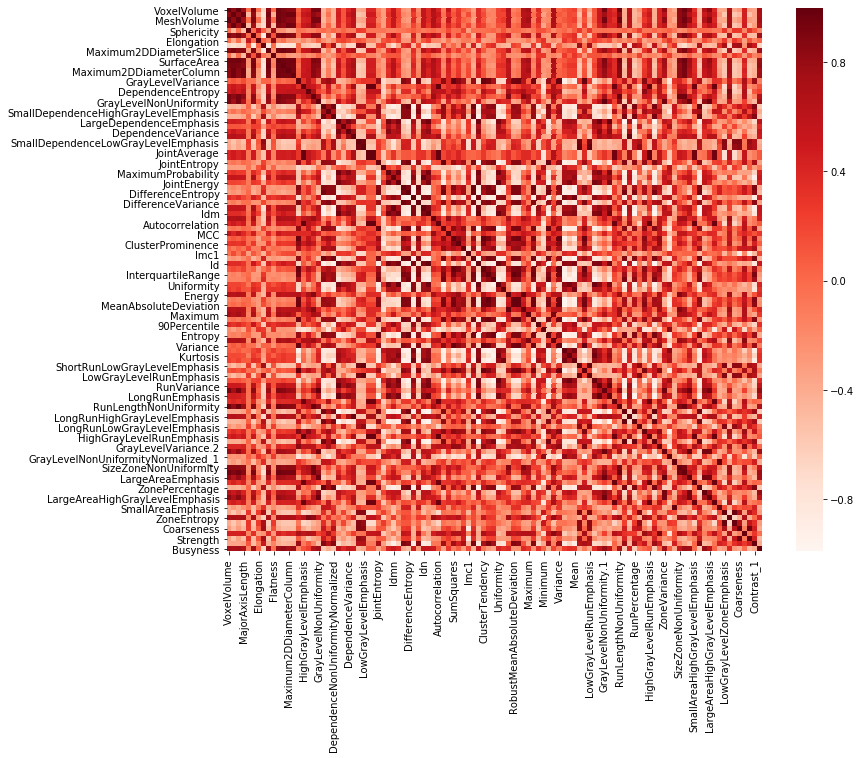

In [33]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = test_data_stand.corr()
sns.heatmap(cor, cmap=plt.cm.Reds)
plt.show()

In [34]:
type(test_data_stand)

pandas.core.frame.DataFrame

#Shapiro Test

Perform the Shapiro-Wilk test for normality: the Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.

In [0]:
from scipy.stats import shapiro

In [0]:
p_value_list_train=[]
for column in train_data_stand.columns:
  stat, p_value = shapiro(train_data_stand[column])
  p_value_list_train.append(p_value)

In [37]:
len(p_value_list_train)

107

In [38]:
min(p_value_list_train)

2.497328837638728e-23

In [0]:
p_value_list_test=[]
for column in test_data_stand.columns:
  stat, p_value = shapiro(test_data_stand[column])
  p_value_list_test.append(p_value)

In [40]:
min(p_value_list_test)

1.6231808648917156e-12

Siccome p_value > 0.5, si può accettare l'ipotesi nulla del Test di Shapiro che afferma che i dati sono distribuiti normalmente.
Le features sono distribuite normalmente.
NON È VERO, ALCUNI HANNO p_value < 0.5, QUINDI NON SONO DISTRIBUITE NORMALMENTE QUINDI NON SI PUÒ EFFETTUARE IL T-test.

#T-test

This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.

Rispetto alla condizione di normalità la distribuzione t è robusta. Con tale termine tecnico si intende affermare  che  rimane  approssimativamente  valida,  anche  quando  le  distribuzioni  di  dati  non  rispettano esattamente la condizione dalla normalità.

In [0]:
import scipy

###T-test su dati non standardizzati

In [0]:
t_test_list=[]
for column in train_data.columns:
   stat, p_value = scipy.stats.ttest_ind(train_data[column], test_data[column])
   t_test_list.append(p_value)

In [43]:
max(t_test_list)

0.9648879165383433

In [44]:
len(t_test_list)

107

p-value alto   ---->   si accetta l'Hp zero   ---->   la differenza osservata è STATISTICAMENTE NON SIGNIFICATIVA

p-value basso ----> si rigetta l'Hp zero ----> la differenza osservata è STATISTICAMENTE SIGNIFICATIVA

Per aclune features si ha p-value alto, per altre p-value basso

In [55]:
t_test_list

[3.4317351899453307e-07,
 8.730036882383007e-13,
 3.5142632934517047e-07,
 2.0505830772651715e-11,
 1.5949733359438712e-12,
 1.4475522011387282e-10,
 0.4276704875706294,
 1.0579516276919862e-07,
 4.328483353993349e-13,
 0.1430240570120943,
 1.3673564406749126e-09,
 2.4171064649018946e-12,
 3.188176919049056e-11,
 9.096802709748628e-12,
 0.00029800526863892974,
 6.442626913330338e-23,
 3.5339258386062758e-06,
 5.018038479263669e-08,
 0.00010080865924253426,
 0.6639706906733716,
 3.8117591135317015e-16,
 0.5164588392620519,
 2.010242423187202e-07,
 0.38699015835999784,
 4.424569014876734e-14,
 0.7608484661449828,
 0.0020215770282853342,
 0.7889562805569947,
 1.6994164721922714e-23,
 1.6994164721733706e-23,
 0.0002915063210505144,
 1.0144675430914247e-05,
 9.451667839663786e-11,
 0.021050390505699432,
 8.892799641815086e-07,
 0.016883726166176494,
 0.2418175820657989,
 0.023746476100822284,
 0.0008229741022181018,
 0.010570834014073636,
 0.028130360926733905,
 0.00034464214251252087,
 1.6

In [46]:
np.mean(t_test_list)

0.10705309135062815

###T-test su dati standardizzati

In [0]:
t_test_list_stand=[]
for column in train_data_stand.columns:
   stat, p_value = scipy.stats.ttest_ind(train_data_stand[column], test_data_stand[column])
   t_test_list_stand.append(p_value)

In [48]:
min(t_test_list_stand)

0.9999999999999127

In [49]:
t_test_list_stand

[0.9999999999999989,
 0.9999999999999974,
 0.9999999999999978,
 0.9999999999999913,
 0.9999999999999948,
 0.999999999999994,
 0.9999999999999961,
 0.9999999999999993,
 1.0,
 0.9999999999999978,
 0.9999999999999988,
 0.9999999999999964,
 0.999999999999997,
 0.9999999999999971,
 0.9999999999999987,
 0.9999999999999943,
 0.9999999999999947,
 0.9999999999999968,
 0.9999999999999994,
 0.9999999999999963,
 0.9999999999999992,
 0.9999999999999996,
 0.9999999999999981,
 0.9999999999999997,
 0.9999999999999996,
 0.9999999999999971,
 0.9999999999999969,
 0.9999999999999991,
 0.9999999999999923,
 0.9999999999999923,
 0.9999999999999878,
 0.9999999999999988,
 0.9999999999999962,
 0.9999999999999127,
 0.9999999999999967,
 1.0,
 0.9999999999999992,
 0.9999999999999876,
 0.9999999999999984,
 0.9999999999999893,
 0.9999999999999969,
 0.9999999999999825,
 0.99999999999999,
 0.9999999999999927,
 0.9999999999999886,
 0.9999999999999997,
 0.999999999999998,
 0.9999999999999765,
 0.9999999999999876,
 0.999

Usando dati standardizzati e non il risultato del T-test viene molto diverso.

#Welch’s t-test, which does not assume equal population variance

###Welch’s t-test su dati non standardizzati

In [0]:
Wt_test_list=[]
for column in train_data.columns:
   stat, p_value = scipy.stats.ttest_ind(train_data[column], test_data[column], equal_var=False)
   Wt_test_list.append(p_value)

In [57]:
max(Wt_test_list)

0.9614591655135909

In [58]:
len(Wt_test_list)

107

p-value alto   ---->   si accetta l'Hp zero   ---->   la differenza osservata è STATISTICAMENTE NON SIGNIFICATIVA

p-value basso ----> si rigetta l'Hp zero ----> la differenza osservata è STATISTICAMENTE SIGNIFICATIVA

Per aclune features si ha p-value alto, per altre p-value basso

In [60]:
Wt_test_list

[2.1126151421715576e-14,
 2.8825116150471667e-18,
 2.206410599078692e-14,
 1.0847361298106966e-16,
 2.7668730709733634e-13,
 2.261819578451625e-15,
 0.3996347743086862,
 8.282792687104922e-06,
 1.1281207676041908e-18,
 0.13003381330031727,
 9.92949203346358e-19,
 6.080440409351813e-18,
 6.122594278821631e-17,
 2.669302479151265e-18,
 3.525440552730312e-05,
 3.693932459176144e-24,
 1.4406372403755037e-05,
 4.1514003180419344e-16,
 6.998121481222529e-09,
 0.6568444514989831,
 1.688339905842733e-15,
 0.5162624339461787,
 3.6748834298826416e-05,
 0.15362541737470672,
 1.2715602446145814e-08,
 0.7574119673543738,
 0.008603251856405253,
 0.710504800145707,
 9.622662362067409e-20,
 9.622662362205598e-20,
 0.0005359047569394376,
 6.892097703680861e-10,
 7.726451367315197e-07,
 0.015890198880179562,
 0.0002178149317766705,
 0.0053194606067372965,
 0.23843387679270084,
 0.011465402178618132,
 0.00011954268796964916,
 0.008376857877831363,
 0.041531383440825895,
 0.00043122861244515777,
 1.548004

In [61]:
np.mean(Wt_test_list)

0.10023742750496842

###Welch’s t-test su dati standardizzati

In [0]:
Wt_test_list_stand = []
for column in train_data_stand.columns:
   stat, p_value = scipy.stats.ttest_ind(train_data_stand[column], test_data_stand[column], equal_var=False)
   Wt_test_list_stand.append(p_value)

In [0]:
min(Wt_test_list_stand)

In [0]:
Wt_test_list_stand

In [0]:
np.mean(Wt_test_list_stand)

Usando dati standardizzati e non il risultato del Welch’s t-test viene molto diverso.

#Casi per istologia

##Train set

In [0]:
df_train.Histology.unique()

In [0]:
list(df_train.Histology).count('adenocarcinoma')

In [0]:
list(df_train.Histology).count('large cell')

In [0]:
list(df_train.Histology).count('squamous cell carcinoma')

##Test set

In [0]:
df_test.Histology.unique()

In [0]:
list(df_test.Histology).count('adenocarcinoma')

In [0]:
list(df_test.Histology).count('large cell')

In [0]:
list(df_test.Histology).count('squamous cell carcinoma')

In [0]:
len(list(df_test.Histology))

In [0]:
47-10-20-4

#Confronto di medie e stdev per tutte le features tra dataset di train e datset di test 

In [0]:
df_train

In [0]:
train_data_bis = df_train.drop(['Histology', 'Overall_Stage'], axis=1)

In [0]:
test_data_bis = df_test.drop(['Histology', 'Overall_Stage'], axis=1)

In [0]:
mean_train_data = train_data_bis.mean()

In [0]:
std_train_data = train_data_bis.std()

In [0]:
mean_test_data = test_data_bis.mean()

In [0]:
std_test_data = test_data_bis.std()

In [0]:
my_dict = {'mean_train_data': mean_train_data , 'std_train_data': std_train_data, 
           'mean_test_data': mean_test_data, 'std_test_data': std_test_data}

In [0]:
result = pd.DataFrame.from_dict(my_dict)

In [0]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


In [0]:
result

#Visualize using PCA dati non standardizzati

In [0]:
from sklearn.decomposition import PCA
import seaborn as sns

In [0]:
train_data = df_train.drop(['Histology', 'Surv_time_months', 'OS', 'Deadstatus_event','Overall_Stage'], axis=1)

In [0]:
test_data = df_test.drop(['Histology', 'Surv_time_months', 'OS', 'Deadstatus_event','Overall_Stage'], axis=1)

In [0]:
train_labels = df_train.Histology

In [0]:
test_labels = df_test.Histology

In [0]:
pca = PCA(n_components=3)
pca_result = pca.fit(train_data)
train_data_pca = pca.transform(train_data)

In [0]:
train_data_pca.shape

In [0]:
type(pca_result)

In [0]:
df = pd.DataFrame(train_data_pca, columns=['pca_one', 'pca_two', 'pca_three'])

In [0]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

La prima componente ha il 96% della varianza dell'intero dataset??

In [0]:
pca_bis=PCA(0.95)
pca_result_bis = pca_bis.fit(train_data)
train_data_pca_bis =  pca_bis.transform(train_data)

In [0]:
train_data_pca_bis.shape

Qualcosa non torna, nelle prove fatte, imponendo di conservare il 95% della varianza, l'algoritmo selezionava 9 features. Cioè 9 componenti principali erano necessarie per esprimere il 95% della varianza del dataset. Ora solo la prima componente esprime il 96%. L'UNICA DIFFERENZA È CHE IN QUESTO CASO NON È STATO FATTO LO Z-SCORE.
DOPO PROVO A FARE LE STESSE COSE CON I DATI STANDARDIZZATI.

Una sola feature conserva il 95% della varianza.

##Scatterplot

Creiamo uno scatter plot della prima e della seconda componente principale, usiamo colori diversi per le diverse istologie.

In [0]:
plt.figure(figsize=(16, 10))
sns.scatterplot(x=df.pca_one, y=df.pca_two, hue=train_labels, 
                palette=sns.color_palette('hls', 3), legend='full')

###Scatterplot 3D

In [0]:
from mpl_toolkits.mplot3d import Axes3D

In [0]:
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

In [0]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(xs=df.pca_one, ys=df.pca_two, zs=df.pca_three, cmap='tab3')
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

#Visualize using LDA dati non standardizzati

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns

In [0]:
train_data = df_train.drop(['Histology', 'Surv_time_months', 'OS', 'Deadstatus_event','Overall_Stage'], axis=1)

In [0]:
test_data = df_test.drop(['Histology', 'Surv_time_months', 'OS', 'Deadstatus_event','Overall_Stage'], axis=1)

In [0]:
train_labels = df_train.Histology

In [0]:
test_labels = df_test.Histology

In [0]:
lda = LinearDiscriminantAnalysis()
lda_result = lda.fit(train_data, train_labels)
train_data_lda = lda.transform(train_data)

In [0]:
train_data_lda.shape

In [0]:
type(lda_result)

In [0]:
df = pd.DataFrame(train_data_lda, columns=['lda_one', 'lda_two'])

In [0]:
df

In [0]:
print('Explained variation per principal component: {}'.format(lda.explained_variance_ratio_))

La prima componente ha il 65% della varianza dell'intero dataset, la seconda il 35%

##Scatterplot

Creiamo uno scatter plot della prima e della seconda componente principale, usiamo colori diversi per le diverse istologie.

In [0]:
plt.figure(figsize=(16, 10))
sns.scatterplot(x=df.lda_one, y=df.lda_two, hue=train_labels, 
                palette=sns.color_palette('hls', 3), legend='full')

#Visualize using QDA (Quadratic Discriminant Analysis) dati non standardizzati

In [0]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import seaborn as sns

In [0]:
train_data = df_train.drop(['Histology', 'Surv_time_months', 'OS', 'Deadstatus_event','Overall_Stage'], axis=1)

In [0]:
test_data = df_test.drop(['Histology', 'Surv_time_months', 'OS', 'Deadstatus_event','Overall_Stage'], axis=1)

In [0]:
train_labels = df_train.Histology

In [0]:
test_labels = df_test.Histology

In [0]:
qda = QuadraticDiscriminantAnalysis()
qda_result = qda.fit(train_data, train_labels)
train_data_qda = qda.predict(train_data)

In [0]:
train_data_qda.shape

In [0]:
type(qda_result)

In [0]:
df

In [0]:
print('Explained variation per principal component: {}'.format(lda.explained_variance_ratio_))

La prima componente ha il 65% della varianza dell'intero dataset, la seconda il 35%

#Visualize using t-SNE dati non standardizzati

 Contrary to PCA it is not a mathematical technique but a probablistic one

t-Distributed stochastic neighbor embedding (t-SNE) minimizes the divergence between two distributions: a distribution that measures pairwise similarities of the input objects and a distribution that measures pairwise similarities of the corresponding low-dimensional points in the embedding.

In case of very high dimensional data, you may need to apply another dimensionality reduction technique before using t-SNE:
**It is highly recommended to use another dimensionality reduction
method (e.g. PCA for dense data or TruncatedSVD for sparse data)
to reduce the number of dimensions to a reasonable amount (e.g. 50)
if the number of features is very high.** 

##t-SNE senza applicare prima PCA

> Indented block



In [0]:
from sklearn.manifold import TSNE

In [0]:
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000)
tsne_result = tsne.fit_transform(train_data)

In [0]:
tsne_result.shape

In [0]:
df_tsne_2D = pd.DataFrame(tsne_result, columns=['tnse_2D_one', 'tnse_2D_two'])

In [0]:
plt.figure(figsize=(16,10))
sns.scatterplot(x=df_tsne_2D.tnse_2D_one, y=df_tsne_2D.tnse_2D_two, hue=train_labels,
    palette=sns.color_palette("bright", 3), legend="full")

##t-SNE applicando prima PCA


In [0]:
pca_50 = PCA(n_components=50)
pca_result = pca_50.fit(train_data)
train_data_pca_50 = pca.transform(train_data)

In [0]:
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Le prime 50 componenti esprimono in pratica il 100% della varianza del dataset. Sappiamo che in realtà ne sono sufficinti molte meno per ottenere quella copertura.

In [0]:
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000)
tsne_result = tsne.fit_transform(train_data_pca_50)

In [0]:
df_tsne_2D_pca = pd.DataFrame(tsne_result, columns=['tnse_pca_2D_one', 'tnse_pca_2D_two'])

In [0]:
plt.figure(figsize=(16,10))
sns.scatterplot(x=df_tsne_2D_pca.tnse_pca_2D_one, y=df_tsne_2D_pca.tnse_pca_2D_two, hue=train_labels,
    palette=sns.color_palette("bright", 3), legend="full")

#Visualize standardizzando prima i dati

##Z score dei dati

In [0]:
mean = train_data.mean(axis=0)
train_data_stand = train_data - mean
std = train_data.std(axis=0)
train_data_stand /= std

In [0]:
train_data-mean

In [0]:
test_data_stand = test_data - mean
test_data_stand /= std

In [0]:
train_data_stand.shape

In [0]:
test_data_stand

##Visualize using PCA

In [0]:
pca = PCA(n_components=3)
pca_result = pca.fit(train_data_stand)
train_data_pca_stand = pca.transform(train_data_stand)

In [0]:
train_data_pca_stand.shape

In [0]:
type(pca_result)

In [0]:
df = pd.DataFrame(train_data_pca_stand, columns=['pca_one_stand', 'pca_two_stand', 'pca_three_stand'])

In [0]:
df

In [0]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

La prima componente ha il 45% della varianza dell'intero dataset



In [0]:
pca_bis=PCA(n_components=0.90, svd_solver='full')
pca_result_bis = pca_bis.fit(train_data_stand)
train_data_pca_bis_stand =  pca_bis.transform(train_data_stand)

In [0]:
train_data_pca_bis_stand.shape

TORNA! Imponendo di conservare il 90% della varianza, l'algoritmo seleziona 9 features. Cioè 9 componenti principali erano necessarie per esprimere il 90% della varianza del dataset. 
L'UNICA DIFFERENZA È CHE IN QUESTO CASO NON È STATO FATTO LO Z-SCORE.
DOPO PROVO A FARE LE STESSE COSE CON I DATI STANDARDIZZATI.

Creiamo uno scatter plot della prima e della seconda componente principale, usiamo colori diversi per le diverse istologie.

###Scatterplot PCA

Creiamo uno scatter plot della prima e della seconda componente principale, usiamo colori diversi per le diverse istologie.

In [0]:
plt.figure(figsize=(16, 10))
sns.scatterplot(x=df.pca_one_stand, y=df.pca_two_stand, hue=train_labels, 
                palette=sns.color_palette('hls', 3), legend='full')

###Scatterplot 3D PCA

In [0]:
from mpl_toolkits.mplot3d import Axes3D

In [0]:
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

In [0]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(xs=df.pca_one_stand, ys=df.pca_two_stand, zs=df.pca_three_stand, cmap='tab3')
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

##Visualize using LDA

In [0]:
lda_stand = LinearDiscriminantAnalysis()
lda_result = lda_stand.fit(train_data_stand, train_labels)
train_data_lda_stand = lda_stand.transform(train_data_stand)

In [0]:
train_data_lda_stand.shape

In [0]:
type(lda_result)

In [0]:
df_stand = pd.DataFrame(train_data_lda_stand, columns=['lda_one', 'lda_two'])

In [0]:
df_stand

Le componenti lda_one e lda_two non cambiano standardizzando i dati oppure no.

In [0]:
print('Explained variation per principal component: {}'.format(lda.explained_variance_ratio_))

La prima componente ha il 65% della varianza dell'intero dataset, la seconda il 35%

###Scatterplot LDA

In [0]:
plt.figure(figsize=(16, 10))
sns.scatterplot(x=df_stand.lda_one, y=df_stand.lda_two, hue=train_labels, 
                palette=sns.color_palette('hls', 3), legend='full')

##Visualize using t-SNE

###t-SNE senza applicare prima PCA su dati standardizzati



In [0]:
from sklearn.manifold import TSNE

In [0]:
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000)
tsne_result_stand = tsne.fit_transform(train_data_stand)

In [0]:
tsne_result_stand.shape

In [0]:
df_tsne_2D_stand = pd.DataFrame(tsne_result_stand, columns=['tnse_2D_one_stand', 'tnse_2D_two_stand'])

In [0]:
plt.figure(figsize=(16,10))
sns.scatterplot(x=df_tsne_2D_stand.tnse_2D_one_stand, y=df_tsne_2D_stand.tnse_2D_two_stand, hue=train_labels,
    palette=sns.color_palette("bright", 3), legend="full")

###t-SNE applicando prima PCA ai dati standardizzati


In [0]:
pca_50_stand = PCA(n_components=50)
pca_result = pca_50_stand.fit(train_data_stand)
train_data_pca_50_stand = pca_50_stand.transform(train_data_stand)

In [0]:
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Le prime 50 componenti esprimono in pratica il 100% della varianza del dataset. Sappiamo che in realtà ne sono sufficinti molte meno per ottenere quella copertura.

In [0]:
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000)
tsne_result = tsne.fit_transform(train_data_pca_50_stand)

In [0]:
df_tsne_2D_pca_stand = pd.DataFrame(tsne_result, columns=['tnse_pca_2D_one_stand', 'tnse_pca_2D_two_stand'])

In [0]:
plt.figure(figsize=(16,10))
sns.scatterplot(x=df_tsne_2D_pca_stand.tnse_pca_2D_one_stand, y=df_tsne_2D_pca_stand.tnse_pca_2D_two_stand, hue=train_labels,
    palette=sns.color_palette("bright", 3), legend="full")

#Remove correlated features

Remove correlated features using https://www.kaggle.com/nuclear/remove-correlated-features

In [0]:
from itertools import chain

In [0]:
correlation_threshold = 0.50 # can be switched. Default value 0.99

cor = train_data.corr().abs()
cor.loc[:,:] =  np.tril(cor, k=-1)
cor = cor.stack()
correlated = cor[cor > correlation_threshold].reset_index().loc[:,['level_0','level_1']]
correlated = correlated.query('level_0 not in level_1')
correlated_array =  correlated.groupby('level_0').agg(lambda x: set(chain(x.level_0,x.level_1))).values
correlated_array

In [0]:
correlated_features = []
for sets in correlated_array:
    element_list = list(sets[0])
    for idx, el in enumerate(element_list):
        if idx is not 0:
            correlated_features.append(el)
#correlated_features.sort(key = lambda x: int(x[1:]) )
correlated_features

In [0]:
len(correlated_features)

In [0]:
non_cor_train_df = train_data.drop(correlated_features, axis=1 )
non_cor_train_df.shape

In [0]:
non_cor_train_df.corr()

Perchè rimangono features più correlate del valore di treshold?

#Remove correlated features bis

https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/

In [0]:
# Create correlation matrix
corr_matrix = train_data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.99)]

In [0]:
corr_matrix

In [0]:
to_drop

In [0]:
len(to_drop)

In [0]:
# Drop features 
train_data_reduced = train_data.drop(train_data[to_drop], axis=1)

In [0]:
train_data_reduced

In [0]:
train_data_reduced.corr()

Penso elimini troppe features!

#Remove correlated feature tris

https://campus.datacamp.com/courses/dimensionality-reduction-in-python/feature-selection-i-selecting-for-feature-information?ex=14

In [0]:
#create a positive correlation matrix
corr_df = train_data.corr().abs()

In [0]:
#create and apply mask
mask = np.triu(np.ones_like(corr_df, dtype=bool))

In [0]:
mask

In [0]:
tri_df = corr_df.mask(mask)

In [0]:
tri_df

In [0]:
#Find columns that meet threshold
to_drop = [c for c in tri_df.columns if any(tri_df[c]>0.50)]
to_drop

The reason we used the mask to set half of the matrox to NA value is that we eant to avoid removing both features when thay have a strong correlation. 

In [0]:
#Drop those columns
reduced_df = train_data.drop(to_drop, axis=1)

In [0]:
reduced_df.shape

funziona bene, però bisogna stare attenti a basarsi unicamente sul coefficiente di correlazione. Se y = x^2, x e y risulteranno scorrelate secondo il coeffiente di correlazione di Pearson.

#Kaplan Meier Curve

In [0]:
!pip install lifelines

In [0]:
from lifelines import KaplanMeierFitter

In [0]:
durations = df_train.Surv_time_months

In [0]:
event_observed = df_train.Deadstatus_event

In [0]:
# create a kmf object
kmf = KaplanMeierFitter() 

# Fit the data into the model
kmf.fit(durations, event_observed,label='Kaplan Meier Estimate')

In [0]:
# Create an estimate
kmf.plot(ci_show=False) ##ci_show show the confidence intervals. Default=True

In [0]:
kmf.plot_survival_function()

##by Histology

In [0]:
kmf1 = KaplanMeierFitter() ## instantiate the class to create an object

Histology = df_train['Histology']   
a = (Histology == 'adenocarcinoma')     
l = (Histology == 'large cell')     
s = (Histology == 'squamous cell carcinoma')  

## fit the model for 1st cohort
kmf1.fit(df_train.Surv_time_months[a], df_train.Deadstatus_event[a], label='adenocarcinoma')
a1 = kmf1.plot(ci_show=False)

## fit the model for 2nd cohort
kmf1.fit(df_train.Surv_time_months[l], df_train.Deadstatus_event[l], label='large cell')
a2 = kmf1.plot(ci_show=False)

## fit the model for 3rd cohort
kmf1.fit(df_train.Surv_time_months[s], df_train.Deadstatus_event[s], label='squamous cell carcinoma')
a3 = kmf1.plot(ci_show=False)

In [0]:
#Metodo scritto in maniera più stringata
kmf = KaplanMeierFitter()

for name, grouped_df in df_train.groupby('Histology'):
    kmf.fit(grouped_df.Surv_time_months, grouped_df.Deadstatus_event, label=name)
    kmf.plot(ci_show=False)

##by Overall_Stage

In [0]:
kmf = KaplanMeierFitter()

for name, grouped_df in df_train.groupby('Overall_Stage'):
    kmf.fit(grouped_df.Surv_time_months, grouped_df.Deadstatus_event, label=name)
    kmf.plot(ci_show=False)

#Survival regression

Prima di fare quest'analisi vanno codificate le variabili categoriche, come l'istologia.

In [0]:
word_index = {'Histology' : {'adenocarcinoma':0, 'large cell':1, 'squamous cell carcinoma':2}}

In [0]:
df_train_encoded_histology = df_train.replace(word_index)

In [0]:
df_train_encoded_histology

In [0]:
df_train_encoded_histology.drop('OS', axis=1, inplace=True)

In [0]:
df_train_encoded_histology.drop('Overall_Stage', axis=1, inplace=True)

These features have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails. MESSAGGIO DI ERRORE CHE VENIVA RESTITUITO.

In [0]:
#list_of_features_to_drop = ['SmallDependenceLowGrayLevelEmphasis', 'LowGrayLevelEmphasis', 'ShortRunLowGrayLevelEmphasis', 'LowGrayLevelRunEmphasis', 'GrayLevelNonUniformityNormalized.1', 'LowGrayLevelZoneEmphasis', 'SmallAreaLowGrayLevelEmphasis', 'Coarseness']

In [0]:
#df_train_encoded_histology.drop(list_of_features_to_drop, axis=1, inplace=True)

In [0]:
from lifelines import CoxPHFitter

# Using Cox Proportional Hazards model
cph = CoxPHFitter(penalizer=0.1)
cph.fit(df_train_encoded_histology, duration_col='Surv_time_months', event_col='Deadstatus_event', show_progress=True)
cph.print_summary()

Introducendo penalizzazioni si arriva a qualche risultato, ma non sono stabili: cambiando penalizzazione cambiano di molto 

#Remove correlated features

https://campus.datacamp.com/courses/dimensionality-reduction-in-python/feature-selection-i-selecting-for-feature-information?ex=14

In [0]:
train_data = df_train.drop(['Histology', 'Surv_time_months', 'OS', 'Deadstatus_event','Overall_Stage'], axis=1)

In [0]:
#create a positive correlation matrix
corr_df = train_data.corr().abs()

In [0]:
#create and apply mask
mask = np.triu(np.ones_like(corr_df, dtype=bool))

In [0]:
mask

In [0]:
tri_df = corr_df.mask(mask)

In [0]:
tri_df

In [0]:
#Find columns that meet threshold
to_drop = [c for c in tri_df.columns if any(tri_df[c]>0.75)]
to_drop

The reason we used the mask to set half of the matrox to NA value is that we eant to avoid removing both features when thay have a strong correlation. 

In [0]:
#Drop those columns
reduced_df = train_data.drop(to_drop, axis=1)

In [0]:
reduced_df.shape

Riaggiungiamo le colonne Surv_time_months e Deadstatus_event

In [0]:
reduced_df['Surv_time_months'] = df_train.Surv_time_months

In [0]:
reduced_df['Deadstatus_event'] = df_train.Deadstatus_event

In [0]:
from lifelines import CoxPHFitter

# Using Cox Proportional Hazards model
cph = CoxPHFitter()
cph.fit(reduced_df, duration_col='Surv_time_months', event_col='Deadstatus_event', show_progress=True)
cph.print_summary()

In [0]:
cph.plot()

In [0]:
from lifelines import CoxPHFitter

cph = CoxPHFitter()
cph.fit(reduced_df, duration_col='Surv_time_months', event_col='Deadstatus_event')

cph.plot_covariate_groups('GrayLevelNonUniformityNormalized_1', 
                          np.linspace(max(reduced_df.GrayLevelNonUniformityNormalized_1),min(reduced_df.GrayLevelNonUniformityNormalized_1),10),cmap='coolwarm')


In [0]:
from lifelines import CoxPHFitter

cph = CoxPHFitter()
cph.fit(reduced_df, duration_col='Surv_time_months', event_col='Deadstatus_event')

cph.plot_covariate_groups('Coarseness', np.linspace(max(reduced_df.Coarseness),min(reduced_df.Coarseness),10),cmap='coolwarm')

In [0]:
min(reduced_df.Coarseness)

In [0]:
from lifelines import CoxPHFitter

cph = CoxPHFitter()
cph.fit(reduced_df, duration_col='Surv_time_months', event_col='Deadstatus_event')

cph.plot_covariate_groups('Contrast_1', np.linspace(max(reduced_df.Contrast_1),min(reduced_df.Contrast_1),10),cmap='coolwarm')